In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import sys
import shap
import mlflow
import mlflow.sklearn
from math import sqrt
from numpy import mean
from numpy import std
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [2]:
def init():
    #load file
    df_train=pd.read_csv("application_train.csv")
    df_test=pd.read_csv("application_test.csv")
    
    #set categories
    df_train["CODE_GENDER"] = df_train["CODE_GENDER"].astype('category').cat.codes
    df_test["CODE_GENDER"] = df_test["CODE_GENDER"].astype('category').cat.codes
    
    df_test['NAME_CONTRACT_TYPE']=df_test["NAME_CONTRACT_TYPE"].astype('category').cat.codes
    df_train['NAME_CONTRACT_TYPE']= df_train["NAME_CONTRACT_TYPE"].astype('category').cat.codes
    
    df_train['FLAG_OWN_CAR']=df_train["FLAG_OWN_CAR"].astype('category').cat.codes
    df_test['FLAG_OWN_CAR']=df_test["FLAG_OWN_CAR"].astype('category').cat.codes
    
    df_test['FLAG_OWN_REALTY']=df_test["FLAG_OWN_REALTY"].astype('category').cat.codes
    df_train['FLAG_OWN_REALTY']= df_train["FLAG_OWN_REALTY"].astype('category').cat.codes
    
    df_train['NAME_TYPE_SUITE']=df_train["NAME_TYPE_SUITE"].astype('category').cat.codes                                                                  
    df_test['NAME_TYPE_SUITE']= df_test["NAME_TYPE_SUITE"].astype('category').cat.codes
    
    df_test['NAME_EDUCATION_TYPE']= df_test["NAME_EDUCATION_TYPE"].astype('category').cat.codes                                                          
    df_train['NAME_EDUCATION_TYPE']= df_train["NAME_EDUCATION_TYPE"].astype('category').cat.codes
    
    df_test['NAME_FAMILY_STATUS']= df_test["NAME_FAMILY_STATUS"].astype('category').cat.codes
    df_train['NAME_FAMILY_STATUS']= df_train["NAME_FAMILY_STATUS"].astype('category').cat.codes
                                                                     
    df_test['NAME_HOUSING_TYPE']=df_test["NAME_HOUSING_TYPE"].astype('category').cat.codes
    df_train['NAME_HOUSING_TYPE']=df_train["NAME_HOUSING_TYPE"].astype('category').cat.codes
                                                              
    df_test['OCCUPATION_TYPE']=df_test["OCCUPATION_TYPE"].astype('category').cat.codes
    df_train['OCCUPATION_TYPE']= df_train["OCCUPATION_TYPE"].astype('category').cat.codes
    
    #prep for display nan / none
    column_with_nan_df_train = df_train.columns[df_train.isnull().any()]
    column_with_nan_df_test = df_test.columns[df_test.isnull().any()]
    
    #display nan / none in test / train
    print("Number of null / column :")
    for column in column_with_nan_df_test:
        print(column, df_test[column].isnull().sum())
    
    for column in column_with_nan_df_train:
        print(column, df_train[column].isnull().sum())
        
    return df_train,df_test

In [3]:
def matrice_corr(df_train,df_test):
    #prepare correlation matrix
    correlations = df_train.corr()['TARGET'].sort_values()
    print('\nMost Positive Correlations: \n', correlations.tail(10))
    print('\nMost Negative Correlations: \n', correlations.head(5),'\n')
    df_train_corr = df_train[['TARGET','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
                          'DAYS_LAST_PHONE_CHANGE','FLOORSMAX_AVG','DAYS_EMPLOYED','EXT_SOURCE_1', 
                          'EXT_SOURCE_2', 'EXT_SOURCE_3',"NAME_EDUCATION_TYPE","CODE_GENDER","DAYS_ID_PUBLISH"]]
    # Calculate correlations
    corr = df_train_corr.corr()
    # Heatmap
    plt.figure(figsize=(15,8))
    sns.heatmap(corr, annot=True, linewidths=.2, cmap="YlGnBu")
    print("\nCorrelation matrix :")
    plt.show()

we choose the values with the most correlation, and we delete the others

In [4]:
def setup_train(df_train,df_test):
    X_train = df_train[['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE',"NAME_EDUCATION_TYPE","CODE_GENDER","DAYS_ID_PUBLISH"]]
    Y_train = df_train["TARGET"]
    
    #Unused
    X_test = df_test[['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE',"NAME_EDUCATION_TYPE","CODE_GENDER","DAYS_ID_PUBLISH"]]
    
    X_train=X_train.dropna()
    
    X_train = X_train[:300000]
    Y_train = Y_train[:300000]
    
    X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)
    
    return X_train_train, X_train_test, y_train_train, y_train_test

In [5]:
def RF_model(X_train_train,X_train_test,y_train_train,y_train_test):
    # creating a RF classifier
    clf = RandomForestClassifier(n_estimators = 100,n_jobs=-1)
     
    # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(X_train_train, y_train_train)
     
    # performing predictions on the test dataset
    y_pred_train = clf.predict(X_train_test)
    
    # using metrics module for accuracy calculation
    print("\nRF accuracy score:\n")
    print(metrics.accuracy_score(y_train_test, y_pred_train))

In [6]:
def GB_model(X_train_train,X_train_test,y_train_train,y_train_test):
    # creating http://localhost:8888/notebooks/Application_of_bigdata_pj/Project%20part%201.ipynb#a RF classifier
    clf2 = GradientBoostingClassifier(n_estimators = 1000) 
     
    # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf2.fit(X_train_train, y_train_train)
     
    # performing predictions on the test dataset
    y_pred_train = clf2.predict(X_train_test)
     
    #using metrics module for accuracy calculation
    print("\nGB accuracy score:\n")
    print(metrics.accuracy_score(y_train_test, y_pred_train))

In [7]:
def XGBC_model(X_train_train,X_train_test,y_train_train,y_train_test,learning_rate,max_depth,scale_pos_weight):
    if float(learning_rate) is None:
        learning_rate = 0.1
    else:
        learning_rate = float(learning_rate)

    # Set default values if no l1_ratio is provided
    if int(max_depth) is None:
        max_depth = 20
    else:
        max_depth = int(max_depth)
            # Set default values if no l1_ratio is provided
    if float(scale_pos_weight) is None:
        scale_pos_weight = 0.30
    else:
        scale_pos_weight = float(scale_pos_weight)
        
    def eval_metrics(actual, pred):
        acc = accuracy_score(actual, pred)
        return acc
    
    with mlflow.start_run():
        
        xg_clf = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, scale_pos_weight=scale_pos_weight,eval_metric='mlogloss',n_jobs=-1,use_label_encoder=False)
        xg_clf.fit(X_train_train,y_train_train)    
        predict = xg_clf.predict(X_train_test)
        
        #print("\nXGBC accuracy score:\n")
        preds = xg_clf.predict(X_train_test)
        (acc) = eval_metrics(y_train_test, preds)
        accu = metrics.accuracy_score(y_train_test, preds)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("scale_pos_weight", scale_pos_weight)
        mlflow.log_metric("Accu", acc)
        print("  Accuracy: %s" % acc)

        mlflow.sklearn.log_model(xg_clf, "model")
        return xg_clf

In [32]:
def get_explainer(model,X_train):
    shap_values = shap.TreeExplainer(model).shap_values(X_train)
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    shap.summary_plot(shap_values, X_train)
    shap.bar_plot(shaplayValues[100], feature_names = X_test.columns, max_display = len(X_test.columns))

Number of null / column :
AMT_ANNUITY 24
OWN_CAR_AGE 32312
EXT_SOURCE_1 20532
EXT_SOURCE_2 8
EXT_SOURCE_3 8668
APARTMENTS_AVG 23887
BASEMENTAREA_AVG 27641
YEARS_BEGINEXPLUATATION_AVG 22856
YEARS_BUILD_AVG 31818
COMMONAREA_AVG 33495
ELEVATORS_AVG 25189
ENTRANCES_AVG 23579
FLOORSMAX_AVG 23321
FLOORSMIN_AVG 32466
LANDAREA_AVG 28254
LIVINGAPARTMENTS_AVG 32780
LIVINGAREA_AVG 23552
NONLIVINGAPARTMENTS_AVG 33347
NONLIVINGAREA_AVG 26084
APARTMENTS_MODE 23887
BASEMENTAREA_MODE 27641
YEARS_BEGINEXPLUATATION_MODE 22856
YEARS_BUILD_MODE 31818
COMMONAREA_MODE 33495
ELEVATORS_MODE 25189
ENTRANCES_MODE 23579
FLOORSMAX_MODE 23321
FLOORSMIN_MODE 32466
LANDAREA_MODE 28254
LIVINGAPARTMENTS_MODE 32780
LIVINGAREA_MODE 23552
NONLIVINGAPARTMENTS_MODE 33347
NONLIVINGAREA_MODE 26084
APARTMENTS_MEDI 23887
BASEMENTAREA_MEDI 27641
YEARS_BEGINEXPLUATATION_MEDI 22856
YEARS_BUILD_MEDI 31818
COMMONAREA_MEDI 33495
ELEVATORS_MEDI 25189
ENTRANCES_MEDI 23579
FLOORSMAX_MEDI 23321
FLOORSMIN_MEDI 32466
LANDAREA_MEDI 28254
L

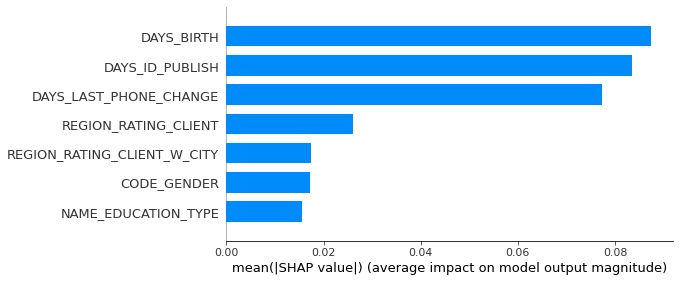

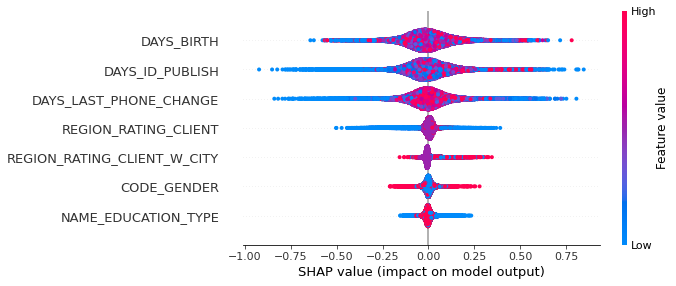

NameError: name 'shaplayValues' is not defined

In [33]:
if __name__ == "__main__":
    df_train,df_test = init()
    #matrice_corr(df_train,df_test)
    X_train_train,X_train_test,y_train_train,y_train_test = setup_train(df_train,df_test)
    #RF_model(X_train_train,X_train_test,y_train_train,y_train_test)
    #GB_model(X_train_train,X_train_test,y_train_train,y_train_test)
    xg_clf = XGBC_model(X_train_train,X_train_test,y_train_train,y_train_test,0.1,35,0.1)
    get_explainer(xg_clf,X_train_test)

